In [1]:
!pip install ultralytics

In [2]:
import torch
torch.cuda.is_available()

False

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls "/content/drive/MyDrive/Colab Notebooks/blood_cell_images_split"

train  val


In [5]:
# Optional: remove empty folders just in case
import os, shutil
for root, dirs, files in os.walk("/content/blood_cell_images_split", topdown=False):
    for d in dirs:
        folder_path = os.path.join(root, d)
        if not os.listdir(folder_path):
            shutil.rmtree(folder_path)

In [6]:
import os
print(os.getcwd())

/content


In [7]:
!cp -r "/content/drive/MyDrive/Colab Notebooks/blood_cell_images_split" /content/

In [8]:
import os
print(os.listdir("/content/blood_cell_images_split"))

['val', 'train']


In [9]:
image_extensions = (".png", ".jpg", ".jpeg")

# Get only class folders (ignore .DS_Store or any files)
def get_class_folders(split_path):
    return sorted([d for d in os.listdir(split_path) if os.path.isdir(os.path.join(split_path, d))])

for split in ["train", "val"]:
    split_path = f"/content/blood_cell_images_split/{split}"
    classes = get_class_folders(split_path)
    print(f"\nChecking {split_path}:")
    for cls in classes:
        cls_path = os.path.join(split_path, cls)
        num_images = len([f for f in os.listdir(cls_path) if f.lower().endswith(image_extensions)])
        print(f" - {cls}: {num_images} images")


Checking /content/blood_cell_images_split/train:
 - .DS_Store: 0 images
 - basophil: 800 images
 - erythroblast: 800 images
 - monocyte: 800 images
 - myeloblast: 800 images
 - seg_neutrophil: 800 images

Checking /content/blood_cell_images_split/val:
 - .DS_Store: 0 images
 - basophil: 200 images
 - erythroblast: 200 images
 - monocyte: 200 images
 - myeloblast: 200 images
 - seg_neutrophil: 200 images


In [10]:
!find /content/blood_cell_images_split/ -name ".DS_Store" -type f -delete

In [11]:
# Double-check classes again
train_path = "/content/blood_cell_images_split/train"
print("Classes YOLO will see:", os.listdir(train_path))

Classes YOLO will see: ['basophil', 'monocyte', 'seg_neutrophil', 'erythroblast', '.DS_Store', 'myeloblast']


In [12]:
val_path = "/content/blood_cell_images_split/val"
print("Classes YOLO will see:", os.listdir(val_path))

Classes YOLO will see: ['basophil', 'monocyte', 'seg_neutrophil', 'erythroblast', '.DS_Store', 'myeloblast']


In [13]:
train_path = "/content/blood_cell_images_split/train"
classes = sorted([d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))])
for i, cls in enumerate(classes):
    print(i, cls)

0 .DS_Store
1 basophil
2 erythroblast
3 monocyte
4 myeloblast
5 seg_neutrophil


In [14]:
from ultralytics import YOLO

# Load YOLO classification model (nano version is small/fast)
model = YOLO("yolov8n-cls.pt")

# Train
model.train(
    data="/content/blood_cell_images_split",
    epochs=10,
    imgsz=224,
    batch=128
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
New https://pypi.org/project/ultralytics/8.3.219 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.218 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=128, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/blood_cell_images_split, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, frac

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c61e43a7920>
curves: []
curves_results: []
fitness: 0.9995000064373016
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9990000128746033, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9995000064373016}
save_dir: PosixPath('/content/runs/classify/train')
speed: {'preprocess': 0.0002296879993082257, 'inference': 13.769358707999345, 'loss': 7.104999895091169e-06, 'postprocess': 1.5072997484821828e-05}
task: 'classify'
top1: 0.9990000128746033
top5: 1.0

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
# Run validation to get metrics
metrics = model.val()

Ultralytics 8.3.218 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLOv8n-cls summary (fused): 30 layers, 1,442,566 parameters, 0 gradients, 3.3 GFLOPs
ERROR ❌ train: /content/blood_cell_images_split/train... found 4000 images in 5 classes (requires 6 classes, not 5)
ERROR ❌ val: /content/blood_cell_images_split/val... found 1000 images in 5 classes (requires 6 classes, not 5)
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 754.2±295.5 MB/s, size: 17.3 KB)
val: Scanning /content/blood_cell_images_split/val... 1000 images, 0 corrupt: 100% ━━━━━━━━━━━━ 1000/1000 631.3Kit/s 0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 63/63 3.8it/s 16.7s
                   all      0.999          1
Speed: 0.0ms preprocess, 11.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/runs/classify/val


In [17]:
# Get confusion matrix as numpy array
cm = metrics.confusion_matrix.matrix  # shape = (num_classes, num_classes)

# Convert to integers
cm_int = cm.astype(int)

In [18]:
# Get class names from the model
class_names = [model.names[i] for i in range(len(model.names))]

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [20]:
# cm_int: shape = (num_classes, num_classes)
num_classes = cm_int.shape[0]

In [21]:
class_names = [model.names[i] if i in model.names else f"class_{i}" for i in range(num_classes)]

In [22]:
# Path to the YOLOv8 training results
csv_path = "/content/runs/classify/train/results.csv"
loss_df = pd.read_csv(csv_path)

In [23]:
train_loss = loss_df['train/loss'].to_numpy()
val_loss   = loss_df['val/loss'].to_numpy()
train_acc = loss_df['metrics/accuracy_top1'].to_numpy()
val_acc   = loss_df['metrics/accuracy_top1'].to_numpy()

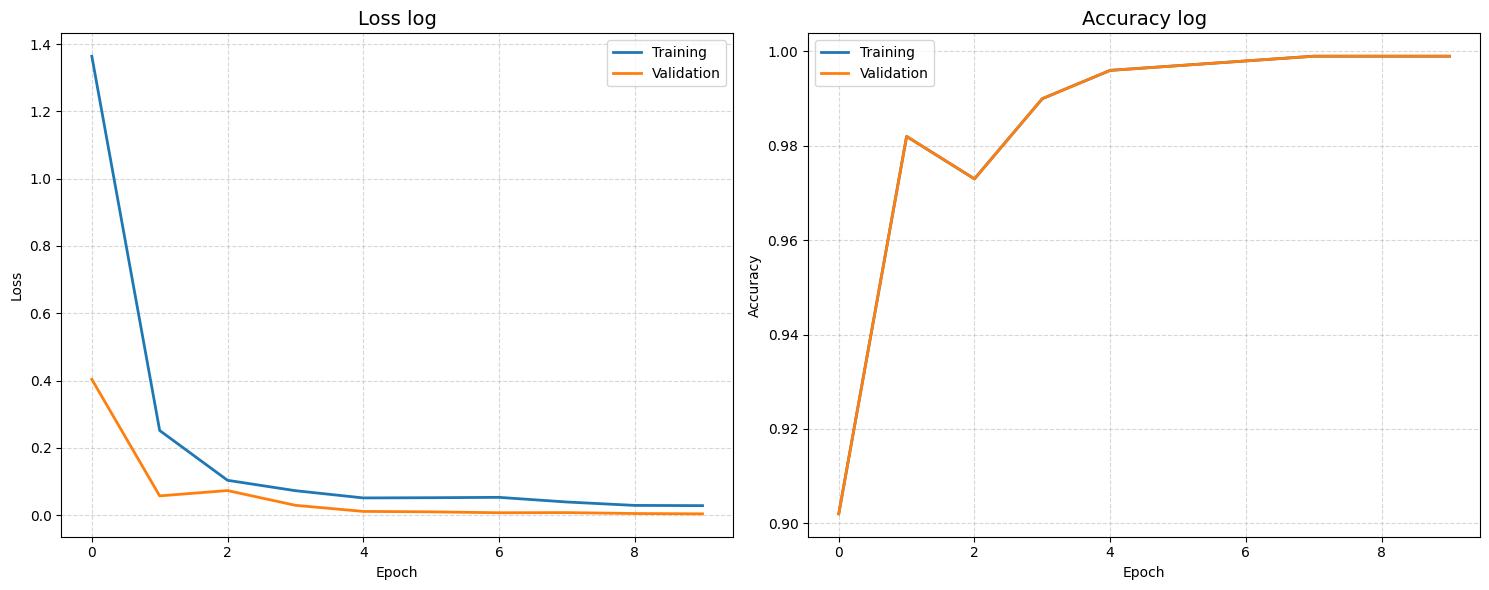

In [24]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Loss log
axes[0].plot(train_loss, label="Training", color='tab:blue', linewidth=2)
axes[0].plot(val_loss, label="Validation", color='tab:orange', linewidth=2)
axes[0].set_title("Loss log", fontsize=14)
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)

# Accuracy log
axes[1].plot(train_acc, label="Training", color='tab:blue', linewidth=2)
axes[1].plot(val_acc, label="Validation", color='tab:orange', linewidth=2)
axes[1].set_title("Accuracy log", fontsize=14)
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

exclude_labels = [".DS_Store", "class_6"]
filtered_names = [name for name in class_names if name not in exclude_labels]
keep_indices = [i for i, name in enumerate(class_names) if name not in exclude_labels]

cm_filtered = cm_int[np.ix_(keep_indices, keep_indices)]

plt.figure(figsize=(8,6))
sns.heatmap(cm_filtered, annot=True, fmt='d', cmap='Blues',
            xticklabels=filtered_names, yticklabels=filtered_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('YOLOv8 Classification Confusion Matrix (filtered)')
plt.show()

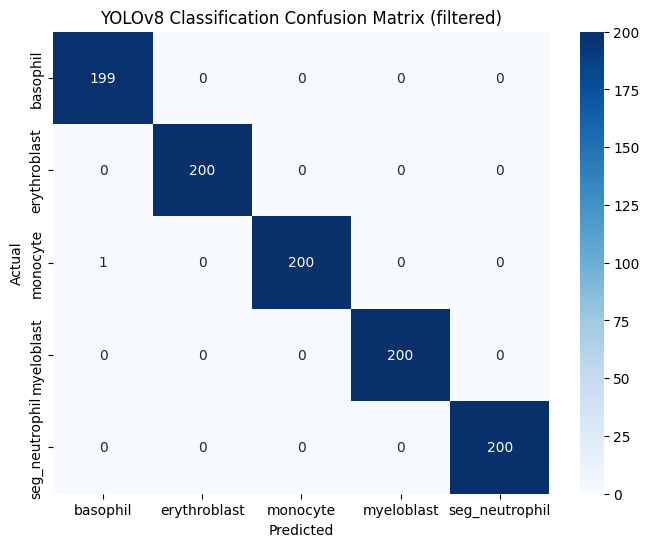

In [25]:
exclude_labels = [".DS_Store", "class_6"]
filtered_names = [name for name in class_names if name not in exclude_labels]
keep_indices = [i for i, name in enumerate(class_names) if name not in exclude_labels]
num_classes = len(filtered_names)

cm_filtered = cm_int[np.ix_(keep_indices, keep_indices)]

plt.figure(figsize=(8,6))
sns.heatmap(cm_filtered, annot=True, fmt='d', cmap='Blues',
            xticklabels=filtered_names, yticklabels=filtered_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('YOLOv8 Classification Confusion Matrix (filtered)')
plt.show()

In [26]:
precision = []
recall = []
f1 = []

support = cm_filtered.sum(axis=1)

for i in range(num_classes):
    tp = cm_filtered[i, i]
    fp = cm_filtered[:, i].sum() - tp
    fn = cm_filtered[i, :].sum() - tp

    prec = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    rec = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1_score = 2*prec*rec / (prec+rec) if (prec+rec) > 0 else 0.0

    precision.append(prec)
    recall.append(rec)
    f1.append(f1_score)

# accuracy
accuracy = cm_filtered.trace() / cm_filtered.sum()

# macro avg
macro_precision = np.mean(precision)
macro_recall = np.mean(recall)
macro_f1 = np.mean(f1)
macro_support = support.sum()

# weighted avg
weighted_precision = np.sum(np.array(precision) * support) / support.sum()
weighted_recall = np.sum(np.array(recall) * support) / support.sum()
weighted_f1 = np.sum(np.array(f1) * support) / support.sum()
weighted_support = support.sum()

In [27]:
print("Classification Report (from confusion matrix):")
print(f"{'Class':<18} {'Precision':>10} {'Recall':>10} {'F1-Score':>10} {'Support':>8}")
for i, name in enumerate(filtered_names):
    print(f"{name:<18} {precision[i]:>10.3f} {recall[i]:>10.3f} {f1[i]:>10.3f} {support[i]:>8}")

print(f"\n{'Accuracy':<18} {accuracy:>10.3f} {'':>10} {'':>10} {support.sum():>8}")
print(f"{'Macro Avg':<18} {macro_precision:>10.3f} {macro_recall:>10.3f} {macro_f1:>10.3f} {macro_support:>8}")
print(f"{'Weighted Avg':<18} {weighted_precision:>10.3f} {weighted_recall:>10.3f} {weighted_f1:>10.3f} {weighted_support:>8}")

print("\nConfusion Matrix:")
print(cm_filtered)

Classification Report (from confusion matrix):
Class               Precision     Recall   F1-Score  Support
basophil                0.995      1.000      0.997      199
erythroblast            1.000      1.000      1.000      200
monocyte                1.000      0.995      0.998      201
myeloblast              1.000      1.000      1.000      200
seg_neutrophil          1.000      1.000      1.000      200

Accuracy                0.999                           1000
Macro Avg               0.999      0.999      0.999     1000
Weighted Avg            0.999      0.999      0.999     1000

Confusion Matrix:
[[199   0   0   0   0]
 [  0 200   0   0   0]
 [  1   0 200   0   0]
 [  0   0   0 200   0]
 [  0   0   0   0 200]]


In [41]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import glob

In [42]:
model = YOLO("runs/classify/train/weights/best.pt")

val_path = "/content/blood_cell_images_split/val"

val_images = []
val_labels = []
class_names = sorted(os.listdir(val_path))  # ['basophil', 'erythroblast', ...]
for idx, cls in enumerate(class_names):
    cls_path = os.path.join(val_path, cls)
    images = glob.glob(os.path.join(cls_path, "*.jpg"))
    val_images.extend(images)
    val_labels.extend([idx]*len(images))

val_labels = np.array(val_labels)
print(f"Found {len(val_images)} validation images.")

results = model.predict(source=val_images, save=False)

y_true = val_labels
y_score = np.array([r.probs.data.cpu().numpy() for r in results])

print("y_true shape:", y_true.shape)
print("y_score shape:", y_score.shape)

Found 1000 validation images.

0: 224x224 basophil 1.00, monocyte 0.00, erythroblast 0.00, seg_neutrophil 0.00, .DS_Store 0.00, 22.0ms
1: 224x224 basophil 1.00, monocyte 0.00, erythroblast 0.00, seg_neutrophil 0.00, .DS_Store 0.00, 22.0ms
2: 224x224 basophil 1.00, monocyte 0.00, erythroblast 0.00, seg_neutrophil 0.00, .DS_Store 0.00, 22.0ms
3: 224x224 basophil 1.00, monocyte 0.00, erythroblast 0.00, seg_neutrophil 0.00, .DS_Store 0.00, 22.0ms
4: 224x224 basophil 1.00, monocyte 0.00, erythroblast 0.00, .DS_Store 0.00, myeloblast 0.00, 22.0ms
5: 224x224 basophil 1.00, erythroblast 0.00, monocyte 0.00, .DS_Store 0.00, seg_neutrophil 0.00, 22.0ms
6: 224x224 basophil 0.99, erythroblast 0.01, monocyte 0.00, .DS_Store 0.00, seg_neutrophil 0.00, 22.0ms
7: 224x224 monocyte 0.53, basophil 0.46, erythroblast 0.01, .DS_Store 0.00, myeloblast 0.00, 22.0ms
8: 224x224 basophil 1.00, erythroblast 0.00, monocyte 0.00, seg_neutrophil 0.00, .DS_Store 0.00, 22.0ms
9: 224x224 basophil 1.00, monocyte 0.00, 

In [46]:
valid_class_indices = [i for i, name in model.names.items() if name != ".DS_Store"]
print("Using class indices:", valid_class_indices)
print("Using class names:", [model.names[i] for i in valid_class_indices])

Using class indices: [1, 2, 3, 4, 5]
Using class names: ['basophil', 'erythroblast', 'monocyte', 'myeloblast', 'seg_neutrophil']


In [47]:
y_score = y_score[:, valid_class_indices]

mapping = {old: new for new, old in enumerate(valid_class_indices)}
y_true_mapped = np.array([mapping[y] for y in y_true])

y_true_bin = label_binarize(y_true_mapped, classes=range(len(valid_class_indices)))
auc_macro = roc_auc_score(y_true_bin, y_score, average='macro', multi_class='ovr')
auc_weighted = roc_auc_score(y_true_bin, y_score, average='weighted', multi_class='ovr')

print(f"AUC (macro): {auc_macro:.4f}")
print(f"AUC (weighted): {auc_weighted:.4f}")

AUC (macro): 1.0000
AUC (weighted): 1.0000


In [48]:
print("Example y_score[0]:", y_score[0])
print("Unique values in y_score:", np.unique(y_score))

Example y_score[0]: [          1  1.2459e-07  1.3992e-06  1.0582e-08  4.5004e-08]
Unique values in y_score: [ 1.2385e-10  4.3166e-10  5.0072e-10 ...           1           1           1]


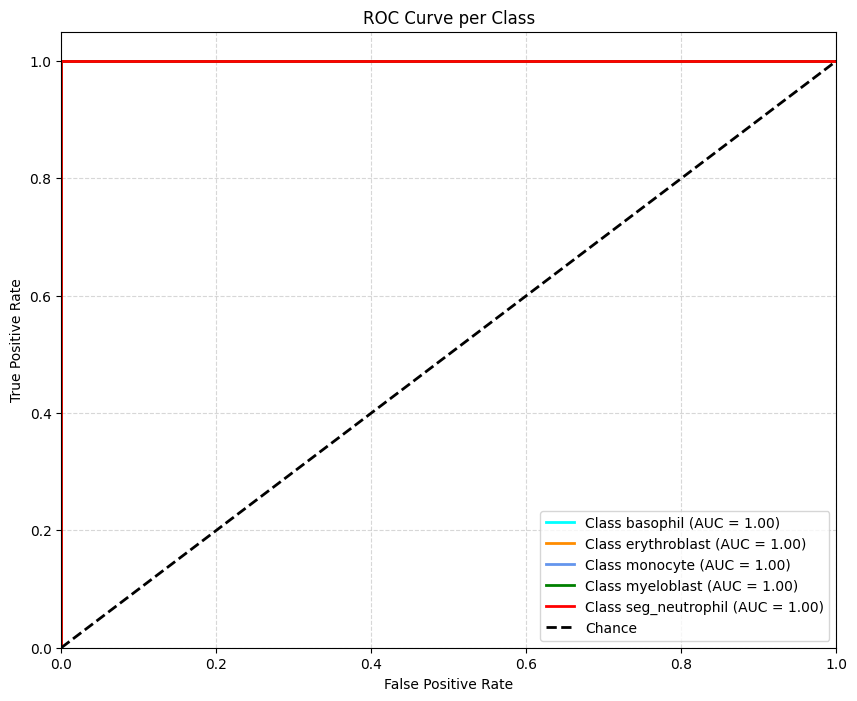

In [50]:
from itertools import cycle

num_classes = y_score.shape[1]

y_true_bin = label_binarize(y_true_mapped, classes=range(num_classes))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple'])

plt.figure(figsize=(10, 8))

for i, color in zip(range(num_classes), colors):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'Class {model.names[valid_class_indices[i]]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Chance')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve per Class')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()